In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.shape

(1025, 14)

In [4]:
df.info()  #checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.isnull().sum()  #check for null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe()  #calculate statistical data on numerical column

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
a=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
for i in a:
    iqr = df[i].quantile(0.75) - df[i].quantile(0.25)
    upper_threshold = df[i].quantile(0.75) + (1.5 * iqr)
    lower_threshold = df[i].quantile(0.25) - (1.5 * iqr)
    print("{} lower threshold :{} and upper threshold :{}".format(i,lower_threshold, upper_threshold))

age lower threshold :28.5 and upper threshold :80.5
sex lower threshold :-1.5 and upper threshold :2.5
cp lower threshold :-3.0 and upper threshold :5.0
trestbps lower threshold :90.0 and upper threshold :170.0
chol lower threshold :115.0 and upper threshold :371.0
fbs lower threshold :0.0 and upper threshold :0.0
restecg lower threshold :-1.5 and upper threshold :2.5
thalach lower threshold :81.0 and upper threshold :217.0
exang lower threshold :-1.5 and upper threshold :2.5
oldpeak lower threshold :-2.7 and upper threshold :4.5
slope lower threshold :-0.5 and upper threshold :3.5
ca lower threshold :-1.5 and upper threshold :2.5
thal lower threshold :0.5 and upper threshold :4.5
target lower threshold :-1.5 and upper threshold :2.5


### Conclusion :

- 'age' which is Age of potential customer whose values lies in between 28.5 and 80.5 which is reasonable by our knowledge.  
- 'chol' which have values which exceedes upper threshold, so we need to handle it.
- 'oldpeak' have values which exceedes upper threshold, so we need to handle it.
- conclusion: outlier detected in 'chol' and 'oldpeak'

In [9]:
a=['chol', 'oldpeak']
for i in a:
    iqr = df[i].quantile(0.75) - df[i].quantile(0.25)
    upper_threshold = df[i].quantile(0.75) + (1.5 * iqr)
    lower_threshold = df[i].quantile(0.25) - (1.5 * iqr)
    df[i]=df[i].clip(lower_threshold, upper_threshold)

In [10]:
df.shape  #shape which give number of rows and column

(1025, 14)

In [12]:
df.duplicated().sum()  #number of duplicated rows present

723

In [13]:
df.drop_duplicates(inplace=True)  #delete the duplicates

In [14]:
df.shape  #check the shape after removing duplicates

(302, 14)

In [15]:
df['sex'].value_counts()   #1=male,0=female.

1    206
0     96
Name: sex, dtype: int64

In [17]:
df['cp'].value_counts()   #chest pain type

0    143
2     86
1     50
3     23
Name: cp, dtype: int64

In [18]:
df['fbs'].value_counts()   #blood sugar greater than 120 1=true,0=false.

0    257
1     45
Name: fbs, dtype: int64

In [19]:
df['restecg'].value_counts()   #resting electrocardiographic results

1    151
0    147
2      4
Name: restecg, dtype: int64

In [21]:
df['exang'].value_counts() #exercise induced angina (1 = yes; 0 = no)

0    203
1     99
Name: exang, dtype: int64

In [23]:
df['slope'].value_counts() #the slope of the peak exercise ST segment

2    141
1    140
0     21
Name: slope, dtype: int64

In [25]:
df['ca'].value_counts() 

0    175
1     65
2     38
3     20
4      4
Name: ca, dtype: int64

In [27]:
df['thal'].value_counts()  #thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

2    165
3    117
1     18
0      2
Name: thal, dtype: int64

In [31]:
df['target'].value_counts()  #0 = no disease and 1 = disease.

1    164
0    138
Name: target, dtype: int64

# EDA

### age

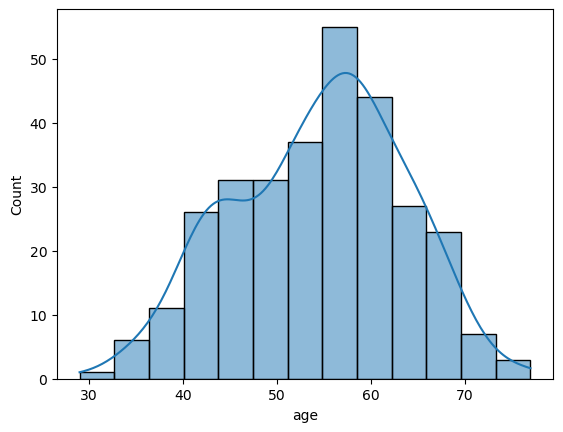

In [28]:
sns.histplot(df,x="age",kde = True);
plt.show()

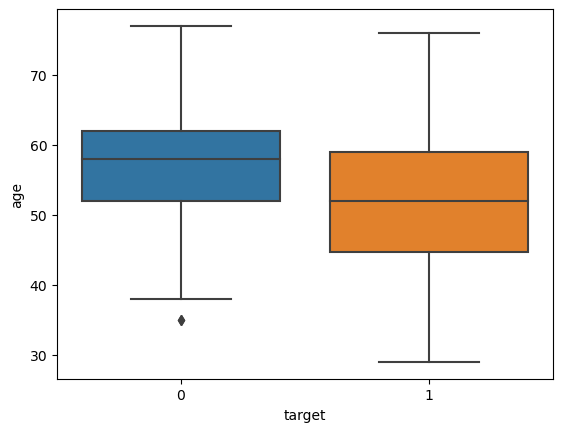

In [30]:
sns.boxplot(data=df,x='target',y='age');

Conclusion:
- From histogram we can tell that we info about people of age group between 50 and 65
- From Boxplot we can tell that people whose age is less than 50 has diseases

### sex

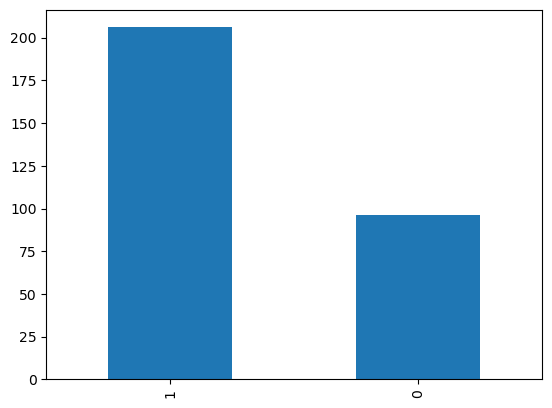

In [36]:
df['sex'].value_counts().plot(kind='bar');

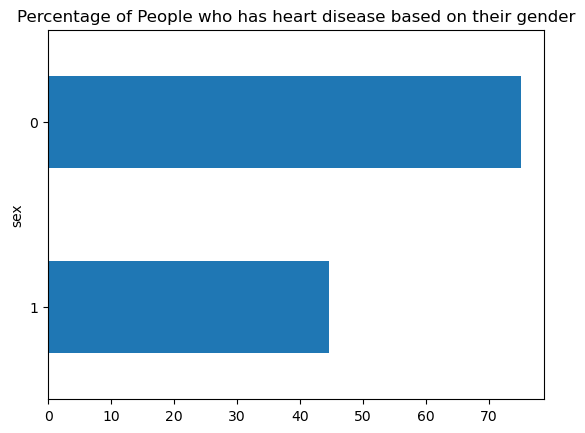

In [39]:
(df.groupby("sex")['target'].mean()*100).sort_values().plot(kind='barh');
plt.title('Percentage of People who has heart disease based on their gender');

Conclusion:
- From Barplot we can tell that we info about male patient.
- From Boxplot we can tell that female patient has high chance of getting heart disease.

### cp

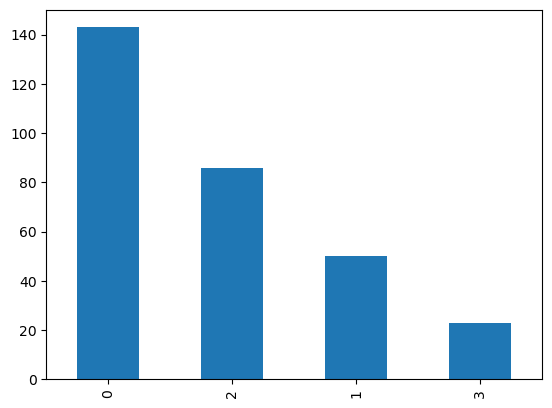

In [40]:
df['cp'].value_counts().plot(kind='bar');

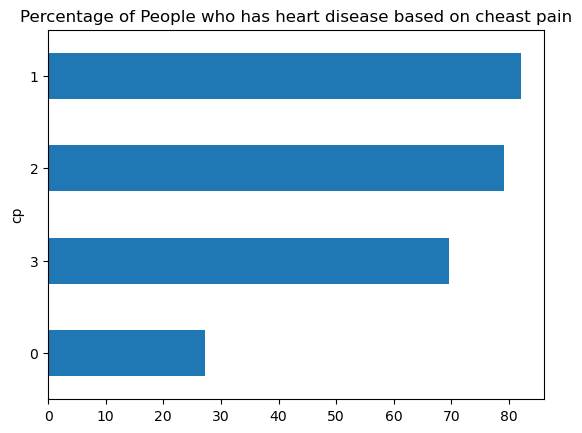

In [42]:
(df.groupby("cp")['target'].mean()*100).sort_values().plot(kind='barh');
plt.title('Percentage of People who has heart disease based on cheast pain');

Conclusion:
- From Barplot we can tell that we info about patient of cheast pain type 1 .
- From Boxplot we can tell that patient with cheast pain type 1,2,3 has equal chance of having disease.

### trestbps

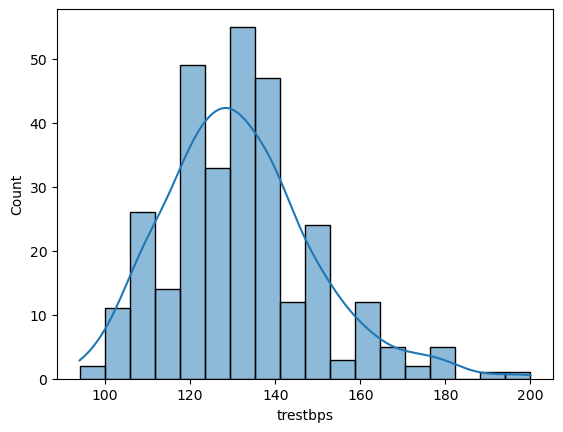

In [46]:
sns.histplot(df,x="trestbps",kde = True);
plt.show()

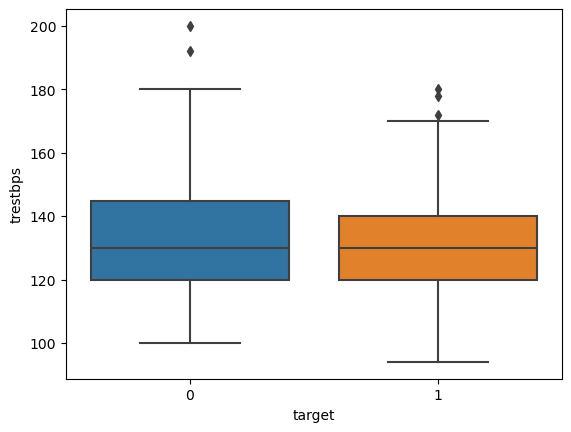

In [47]:
sns.boxplot(data=df,x='target',y='trestbps');

Conclusion:
- people with blood pressure greater than 140 least likely have heart disease

### chol

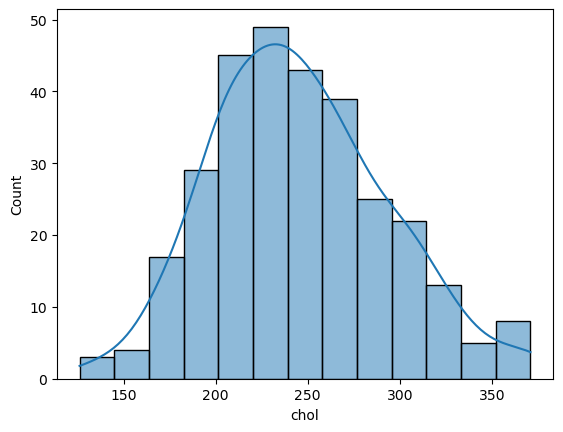

In [48]:
sns.histplot(df,x="chol",kde = True);
plt.show()

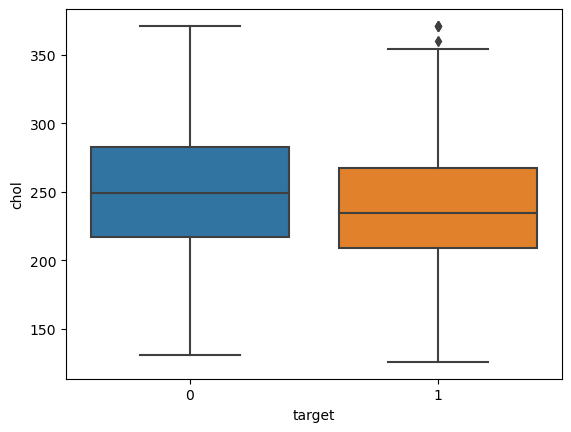

In [49]:
sns.boxplot(data=df,x='target',y='chol');

Conclusions:
- serum cholestoral in mg/dl who has really high will have heart disease

### fbs

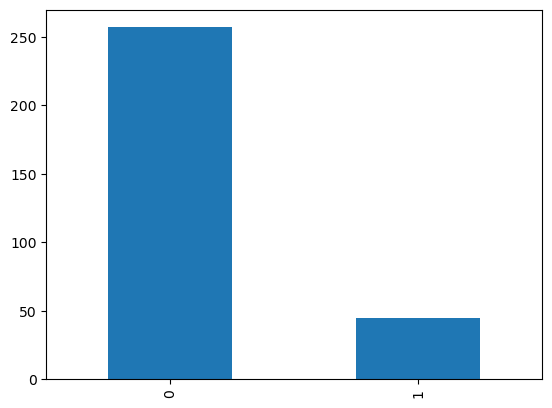

In [43]:
df['fbs'].value_counts().plot(kind='bar');

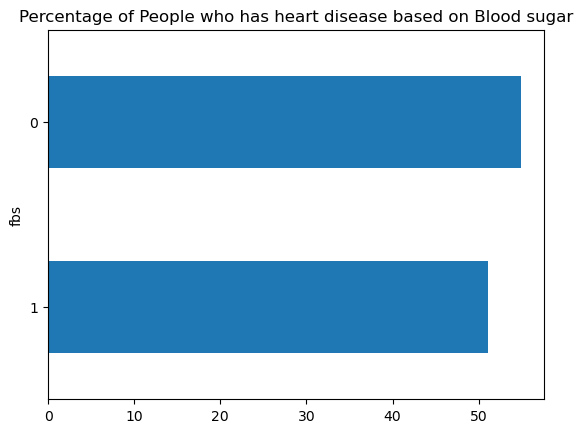

In [45]:
(df.groupby("fbs")['target'].mean()*100).sort_values().plot(kind='barh');
plt.title('Percentage of People who has heart disease based on Blood sugar');

Conclusion:
- From Barplot we can tell that we info about patient who has low blood sugar(less than 120 mg/l) .
- From Boxplot we can tell that patient with blood sugar doesn't affect much in predicting the heart disease.

### restecg

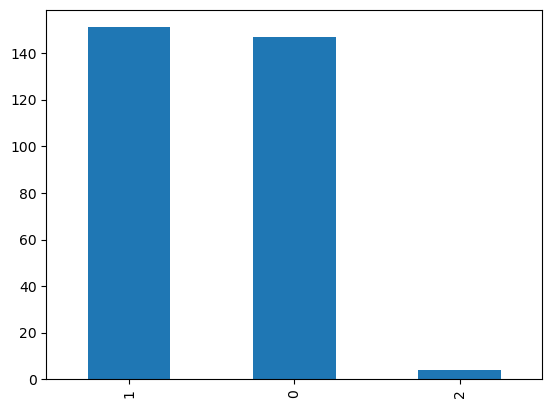

In [52]:
df['restecg'].value_counts().plot(kind='bar');

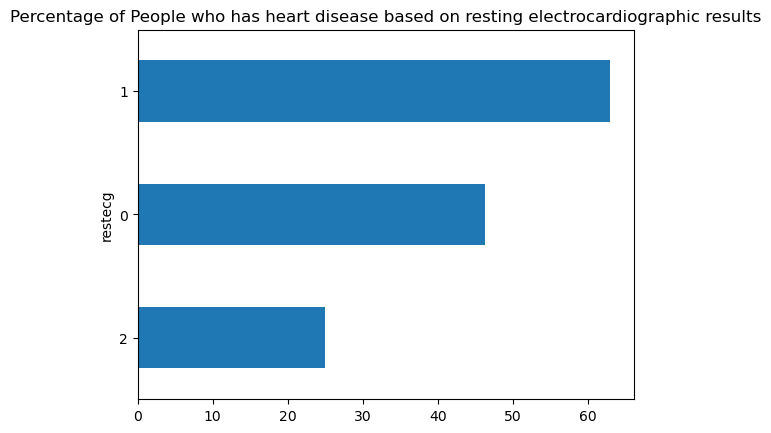

In [54]:
(df.groupby("restecg")['target'].mean()*100).sort_values().plot(kind='barh');
plt.title('Percentage of People who has heart disease based on resting electrocardiographic results');

### thalach

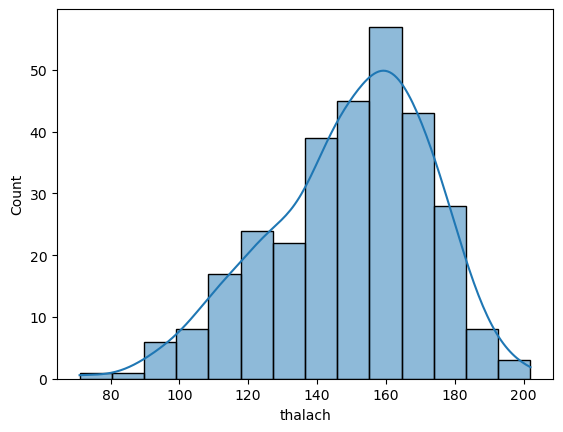

In [55]:
sns.histplot(df,x="thalach",kde = True);
plt.show()

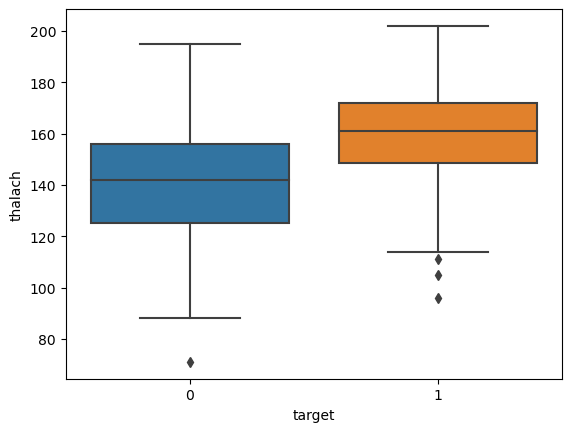

In [56]:
sns.boxplot(data=df,x='target',y='thalach');

Conclusion:
- People who have heart rate greater than 160 most likely to have heart disease

### exang

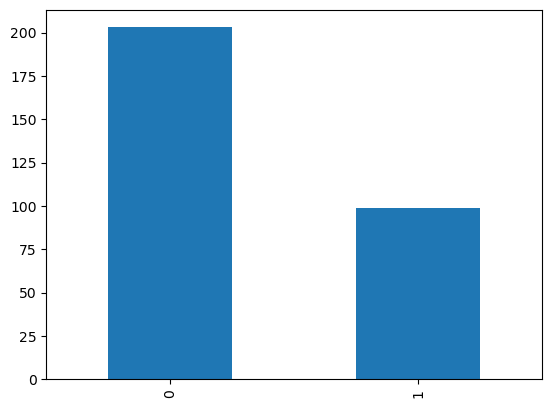

In [58]:
df['exang'].value_counts().plot(kind='bar');

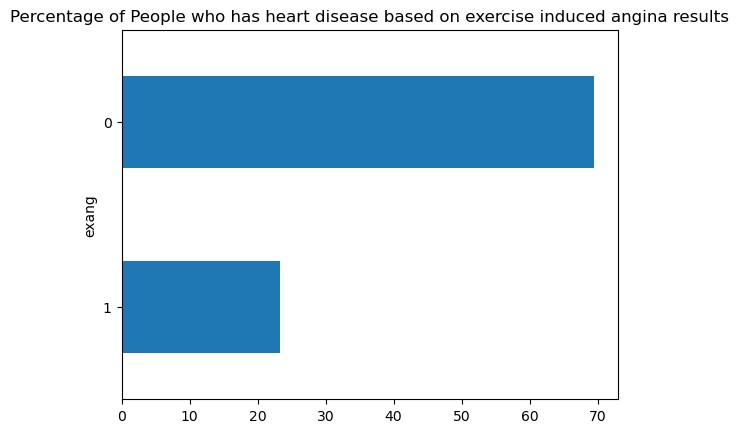

In [61]:
(df.groupby("exang")['target'].mean()*100).sort_values().plot(kind='barh');
plt.title('Percentage of People who has heart disease based on exercise induced angina results');

### oldpeak

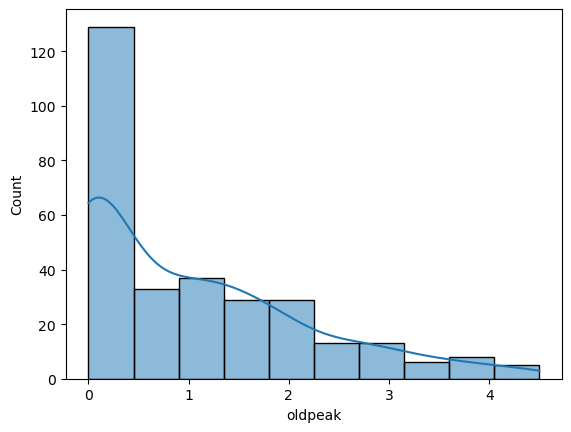

In [64]:
sns.histplot(df,x="oldpeak",kde = True);
plt.show()

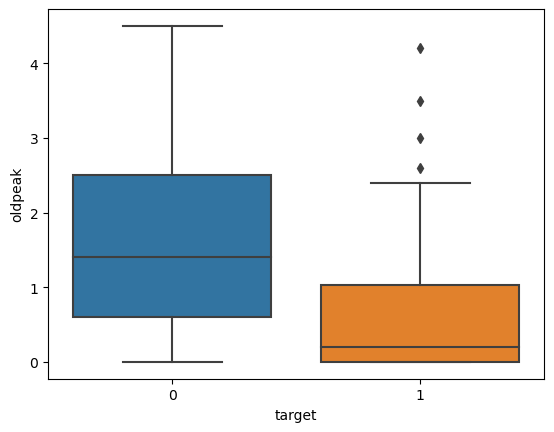

In [65]:
sns.boxplot(data=df,x='target',y='oldpeak');

In [66]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

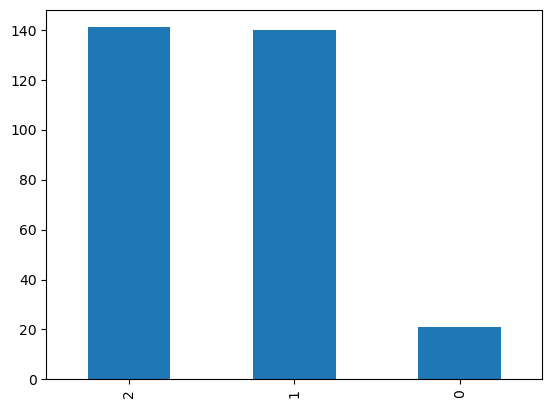

In [67]:
df['slope'].value_counts().plot(kind='bar');

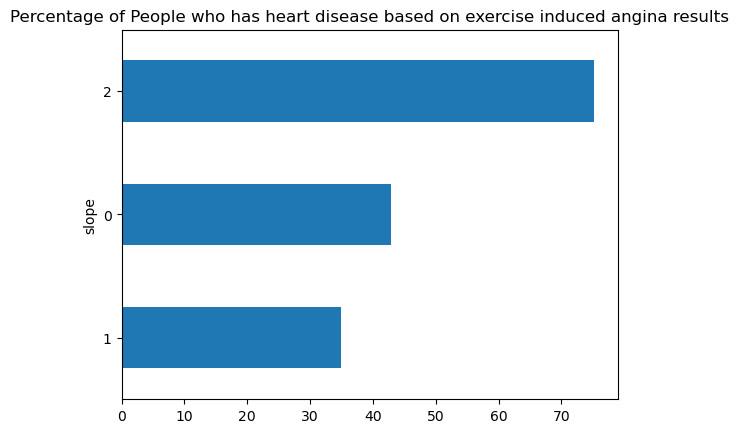

In [68]:
(df.groupby("slope")['target'].mean()*100).sort_values().plot(kind='barh');
plt.title('Percentage of People who has heart disease based on exercise induced angina results');

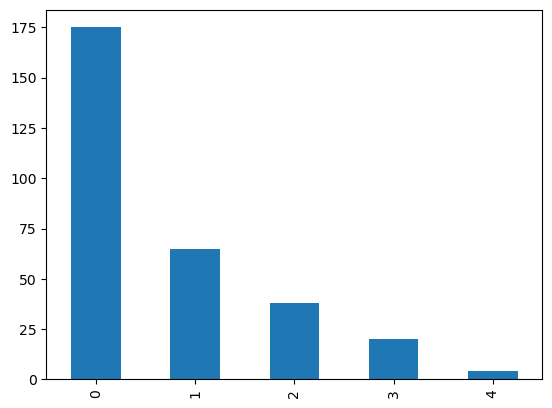

In [71]:
df['ca'].value_counts().plot(kind='bar');

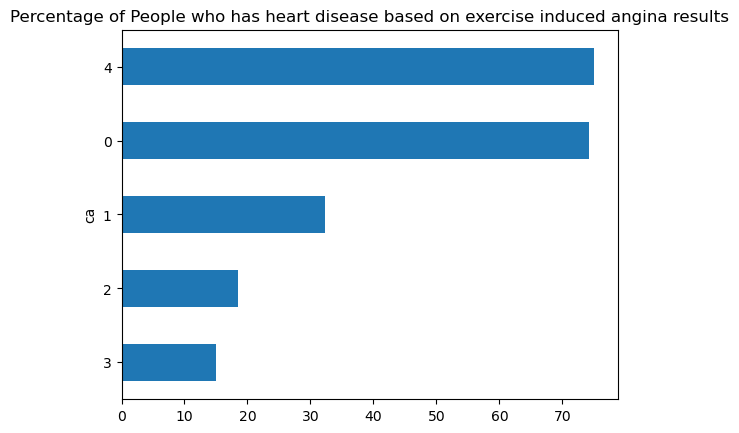

In [72]:
(df.groupby("ca")['target'].mean()*100).sort_values().plot(kind='barh');
plt.title('Percentage of People who has heart disease based on exercise induced angina results');

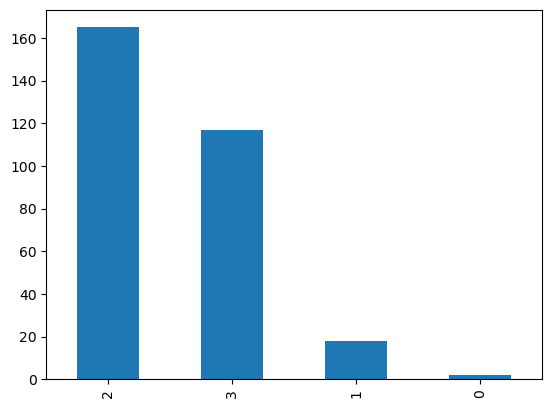

In [69]:
df['thal'].value_counts().plot(kind='bar');

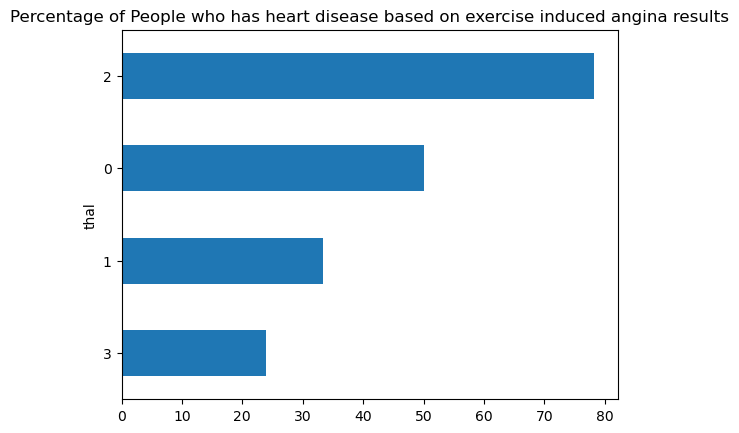

In [70]:
(df.groupby("thal")['target'].mean()*100).sort_values().plot(kind='barh');
plt.title('Percentage of People who has heart disease based on exercise induced angina results');

## Data Splitting

In [74]:
from sklearn.model_selection import train_test_split

X=df.drop(columns=['target']).values
y=df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=3,stratify=y)

In [75]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(np.unique(y_train,return_counts=True))

(211, 13) (91, 13) (211,) (91,)
(array([0, 1], dtype=int64), array([ 96, 115], dtype=int64))


## Data Scaling

In [76]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 

scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

## Training Data Balancing

In [77]:
from imblearn.combine import SMOTEENN

smt = SMOTEENN(sampling_strategy='all')
X_train_balanced, y_train_balanced = smt.fit_resample(X_train_scaled, y_train)

In [78]:
print(X_train_balanced.shape, X_test.shape, y_train_balanced.shape, y_test.shape)
print(np.unique(y_train,return_counts=True))

(137, 13) (91, 13) (137,) (91,)
(array([0, 1], dtype=int64), array([ 96, 115], dtype=int64))


## LogisticRegression

In [79]:
from sklearn.linear_model import LogisticRegression #main code that build the LR model 
logistic_regression= LogisticRegression() #initialise the required package
logistic_regression.fit(X_train_balanced,y_train_balanced) #magic happens - best values of betas - training/learning happens here

LogisticRegression()

In [80]:
y_pred=logistic_regression.predict(X_test_scaled)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0], dtype=int64)

In [81]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[32, 10],
       [ 7, 42]], dtype=int64)

In [82]:
from sklearn.metrics import roc_auc_score

lg_roc=roc_auc_score(y_test,logistic_regression.predict_proba(X_test_scaled)[:,1])
print(lg_roc)

0.8838678328474247


In [83]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [85]:
coef=pd.DataFrame(logistic_regression.coef_.reshape(-1),[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']],["Coefficients"])
coef

,Coefficients
age,-0.160460
sex,-1.038028
cp,1.158060
trestbps,0.229153
chol,-0.321493
fbs,-0.077267
restecg,0.061565
thalach,0.992790
exang,-1.438602
oldpeak,-1.051642


In [86]:
coef.reset_index(inplace=True)
coef["Coefficients"]=coef["Coefficients"].apply(lambda x:abs(x))
coef["Importnace"]=coef["Coefficients"].apply(lambda x:x/coef["Coefficients"].sum())

In [87]:
coef

,level_0,Coefficients,Importnace
0,age,0.160460,0.017336
1,sex,1.038028,0.112147
2,cp,1.158060,0.125115
3,trestbps,0.229153,0.024757
4,chol,0.321493,0.034734
5,fbs,0.077267,0.008348
6,restecg,0.061565,0.006651
7,thalach,0.992790,0.107260
8,exang,1.438602,0.155425
9,oldpeak,1.051642,0.113618


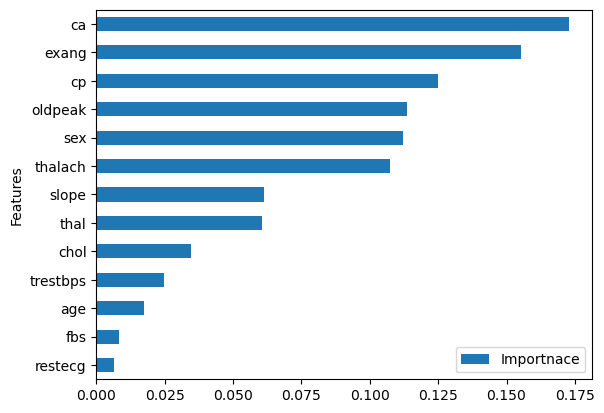

In [88]:
coef=coef.rename(columns={'level_0':'Features'})
coef.sort_values("Importnace",ascending=True,inplace=True)
coef.plot(kind='barh',y="Importnace",x="Features");

Conclusion:
- ca,exang is very important features while predicting in Logistic Regression model

## K-NN

In [89]:
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler ## standrard scalig 
import warnings
warnings.filterwarnings("ignore")

# Define the KNN classifier
knn = KNeighborsClassifier()

# Define the pipeline that includes the KNN classifier and SMOTEENN
pipeline = Pipeline([
    ('smoteenn', SMOTEENN(random_state=11)),
    ('scaler', StandardScaler()),
    ('knn', knn)
])

# Define the parameter grid to search
param_grid = {'knn__n_neighbors': list(range(1,50))}

# Perform grid search using cross-validation
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Print the best parameter and score
print("Best parameter:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameter: {'knn__n_neighbors': 18}
Best score: 0.8845766590389015


In [91]:
X=df.drop(columns=['target'])
y=df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=3,stratify=y)

scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 


from imblearn.combine import SMOTEENN

smt = SMOTEENN(sampling_strategy='all')
X_train_balanced, y_train_balanced = smt.fit_resample(X_train_scaled, y_train)

In [92]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(18)
knn.fit(X_train_balanced,y_train_balanced)
knn.score(X_test_scaled,y_test)

0.7802197802197802

In [93]:
y_pred = knn.predict(X_test_scaled)
y_pred

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0], dtype=int64)

In [94]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[28, 14],
       [ 6, 43]], dtype=int64)

In [95]:
from sklearn.metrics import roc_auc_score

knn_roc=roc_auc_score(y_test,knn.predict_proba(X_test_scaled)[:,1])
print(knn_roc)

0.8644314868804664


## Decision Tree

In [96]:
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=34)

pipeline = Pipeline([
    ('smoteenn', SMOTEENN(random_state=11)),
    ('scaler', StandardScaler()),
    ('dt', dt)
])

param_grid = {'dt__max_depth': list(range(1,50))}

grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

print("Best parameter:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameter: {'dt__max_depth': 2}
Best score: 0.6824942791762013


In [97]:
X=df.drop(columns=['target'])
y=df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=3,stratify=y)

from imblearn.combine import SMOTEENN

smt = SMOTEENN(sampling_strategy='all')
X_train_balanced, y_train_balanced = smt.fit_resample(X_train, y_train)

In [98]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train_balanced ,y_train_balanced) 
y_pred = dt.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [99]:
from sklearn.metrics import roc_auc_score
dt_roc=roc_auc_score(y_test,dt.predict_proba(X_test)[:,1])
print(dt_roc)

0.684402332361516


In [100]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[25, 17],
       [13, 36]], dtype=int64)

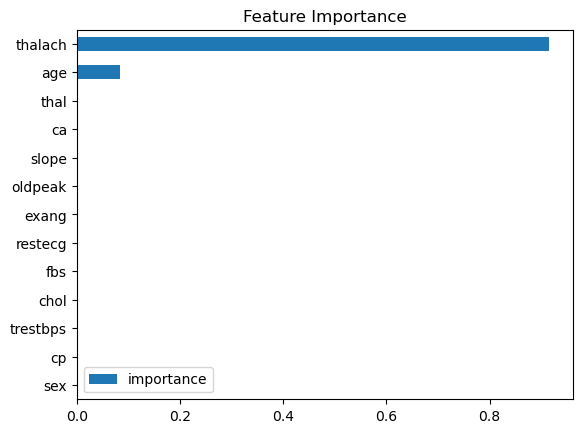

In [101]:
fi = pd.DataFrame(data=dt.feature_importances_,
             index=dt.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

Conclusion:
- From Decision Tree we can say that A blood disorder called thalassemia is very important feature in determing the prediction

## Random Forest

In [102]:
X=df.drop(columns=['target'])
y=df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=3,stratify=y)

from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
X_train_balanced, y_train_balanced = smt.fit_resample(X_train, y_train)

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators= 100, max_depth = 2, max_features='sqrt')
rf.fit(X_train_balanced, y_train_balanced)
y_pred=rf.predict(X_test)
#print(rf.score(X_test,y_test))
print(accuracy_score(y_pred,y_test))

0.7362637362637363


In [104]:
confusion_matrix(y_test,y_pred)

array([[36,  6],
       [18, 31]], dtype=int64)

In [105]:
rf_roc=roc_auc_score(y_test,rf.predict_proba(X_test)[:,1])
print(rf_roc)

0.8338192419825073


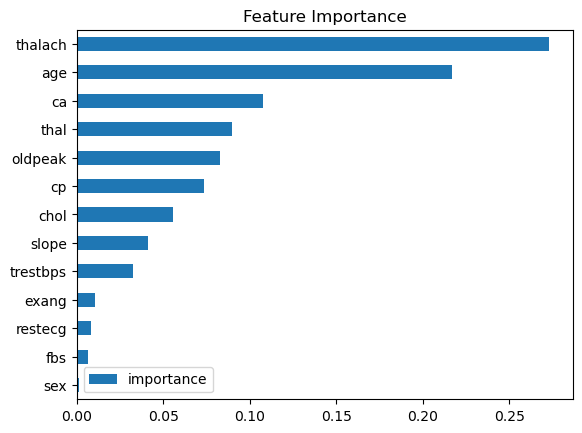

In [106]:
fi = pd.DataFrame(data=rf.feature_importances_,
             index=rf.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

Conclusion:
- From Random Forest Model we can say that 'thalanch' and 'age' is very important feature in determing the prediction

## Voting Classifier

In [107]:
from sklearn.ensemble import VotingClassifier # this is the function that ensembles my model
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

model1 = LogisticRegression(random_state=1)
model2 = tree.DecisionTreeClassifier(random_state=1)
model3 = KNeighborsClassifier(3)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2),('knn',model3)], voting='soft') # it will stitich all the models together, voting = hard means max voting 

model.fit(X_train,y_train) # to train all of the models
preds = model.predict(X_test)
vc_roc=roc_auc_score(y_test,model.predict_proba(X_test)[:,1])
print(vc_roc)

0.8824101068999028


In [108]:
y_pred=model.predict(X_test)

confusion_matrix(y_test,y_pred)

array([[28, 14],
       [ 7, 42]], dtype=int64)

## Bagging Classifier

In [109]:
X=df.drop(columns=['target'])
y=df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=3,stratify=y)


from imblearn.combine import SMOTEENN

smt = SMOTEENN(sampling_strategy='all')
X_train_balanced, y_train_balanced = smt.fit_resample(X_train, y_train)

In [110]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(max_depth = 7, random_state=1), n_estimators=100)
model.fit(X_train_balanced, y_train_balanced)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=7,
                                                        random_state=1),
                  n_estimators=100)

In [111]:
bag_roc=roc_auc_score(y_test,model.predict_proba(X_test)[:,1])
print(bag_roc)

0.7371234207968902


In [112]:
y_pred=model.predict(X_test)

confusion_matrix(y_test,y_pred)

array([[30, 12],
       [19, 30]], dtype=int64)

### XG Boost

In [113]:
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

# Define the KNN classifier
#dt = DecisionTreeClassifier(random_state=34)
xgb = XGBClassifier(n_estimators=100, verbosity = 0) 


# Define the pipeline that includes the KNN classifier and SMOTEENN
pipeline = Pipeline([
    ('smoteenn', SMOTEENN(random_state=11)),
    ('xgb', xgb)
])

# Define the parameter grid to search
param_grid = {
    'xgb__learning_rate': np.arange(0.01, 1.01, 0.01)

}
#param_grid = {'knn__n_neighbors': list(range(1,5))}

# Perform grid search using cross-validation
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Print the best parameter and score
print("Best parameter:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameter: {'xgb__learning_rate': 0.15000000000000002}
Best score: 0.8079977116704805


In [114]:
X=df.drop(columns=['target'])
y=df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=3,stratify=y)

from imblearn.combine import SMOTEENN

smt = SMOTEENN(sampling_strategy='all')
X_train_balanced, y_train_balanced = smt.fit_resample(X_train, y_train)

In [119]:
model = XGBClassifier(learning_rate = 0.15, n_estimators=100)
model.fit(X_train_balanced,y_train_balanced) #train the model
model.score(X_test, y_test)

0.6593406593406593

In [120]:
y_pred = model.predict(X_test)

In [121]:
from sklearn.metrics import roc_auc_score
xg_roc=roc_auc_score(y_test,model.predict_proba(X_test)[:,1])
print(xg_roc)

0.782798833819242


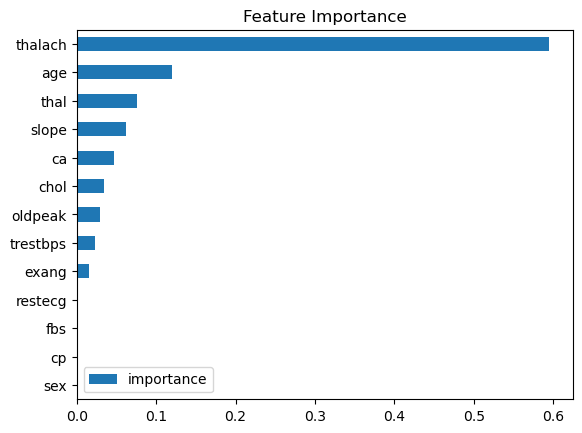

In [122]:
fi = pd.DataFrame(data=model.feature_importances_,
             index=model.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

Conclusion:
- From XGBoost Model we can say that firstly 'thalach' and then 'age' is very important feature in determing the prediction

# Summary:

In [123]:
data={'ROC_SCORE':[lg_roc,knn_roc,dt_roc,rf_roc,vc_roc,bag_roc,xg_roc]}
label=['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Voting Classifier', 'Bagging', 'XGBoost']
Final=pd.DataFrame(data,index=label)
Final

,ROC_SCORE
Logistic Regression,0.883868
KNN,0.864431
Decision Tree,0.684402
Random Forest,0.833819
Voting Classifier,0.882410
Bagging,0.737123
XGBoost,0.782799


Conclusion:
- Logistic Regression gives better prediction compared to other Model with ROC score of 0.88